In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Upload the Dataset first

In [41]:
df = pd.read_csv("/content/bodyfat.csv")

In [42]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [43]:
df.shape

(252, 15)

In [44]:
# Checking for Null values:

df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [45]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [46]:
x = df.iloc[:, 0:14]
y = df['BodyFat']

In [47]:
# y = df.pop("BodyFat")
# x = df

In [48]:
x

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4


In [49]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [50]:
# 1. Splitting the dataset

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

x_temp_train, x_test, y_temp_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [51]:
x_temp_train.shape

(214, 14)

In [52]:
252*0.85

214.2

In [53]:
252*0.15

37.8

In [54]:
38/214

0.17757009345794392

In [55]:
x_train, x_val, y_train, y_val  = train_test_split(x_temp_train, y_temp_train, test_size=0.17757009345794392, random_state=42)

In [56]:
x_train.shape                  # Try normalizing then inputing it in one trials

(176, 14)

In [57]:
x_val.shape

(38, 14)

In [58]:
x_test.shape

(38, 14)

In [59]:
# Model 1 Building with Relu:

model1_r = tf.keras.Sequential()

model1_r.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model1_r.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer"))
model1_r.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model1_r.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model1_r.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer (Dense)         (None, 128)               1920      
                                                                 
 outputLayers (Dense)        (None, 1)                 129       
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 39ms/step - loss: 4235.2441 - root_mean_squared_error: 65.0788 - val_loss: 1270.1578 - val_root_mean_squared_error: 35.6393
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 709.7865 - root_mean_squared_error: 26.6418 - val_loss: 41.5580 - val_root_mean_squared_error: 6.4465
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 105.6284 - root_mean_squared_error: 10.2776 - val_loss: 377.1379 - val_root_mean_squared_error: 19.4200
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 370.9195 - root_mean_squared_error: 19.2593 - val_loss: 447.5509 - val_root_mean_squared_error: 21.1554
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 292.1337 - root_mean_squared_error: 17.0919 - val_loss: 176.1288 - val_root_mean_squared_error: 13.2714
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 86.3124 - root_mean_square

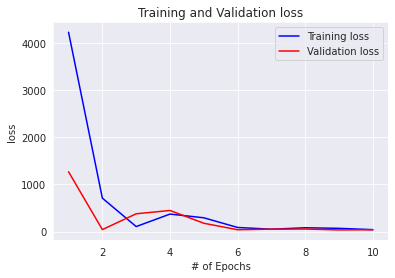


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 21ms/step - loss: 38.9645 - root_mean_squared_error: 6.2422 - val_loss: 50.6138 - val_root_mean_squared_error: 7.1143
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 42.4581 - root_mean_squared_error: 6.5160 - val_loss: 47.5600 - val_root_mean_squared_error: 6.8964
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 38.3335 - root_mean_squared_error: 6.1914 - val_loss: 36.1582 - val_root_mean_squared_error: 6.0132
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 35.6099 - root_mean_squared_error: 5.9674 - val_loss: 31.4660 - val_root_mean_squared_error: 5.6095
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 35.3943 - root_mean_squared_error: 5.9493 - val_loss: 30.7999 - val_root_mean_squared_error: 5.5498
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 34.4350 - root_mean_squared_error: 5.8681 - v

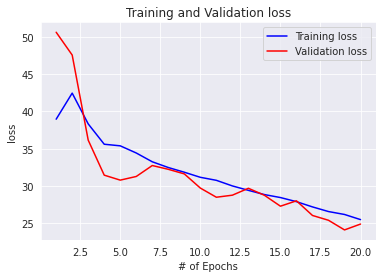


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 40ms/step - loss: 24.9267 - root_mean_squared_error: 4.9927 - val_loss: 24.8916 - val_root_mean_squared_error: 4.9892
Epoch 2/30
5/5 [==============================] - 0s 16ms/step - loss: 24.3425 - root_mean_squared_error: 4.9338 - val_loss: 23.6699 - val_root_mean_squared_error: 4.8652
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 23.8215 - root_mean_squared_error: 4.8807 - val_loss: 22.0611 - val_root_mean_squared_error: 4.6969
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 23.3882 - root_mean_squared_error: 4.8361 - val_loss: 21.8806 - val_root_mean_squared_error: 4.6777
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 22.6866 - root_mean_squared_error: 4.7630 - val_loss: 22.1832 - val_root_mean_squared_error: 4.7099
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 22.1124 - root_mean_squared_error: 4.7024

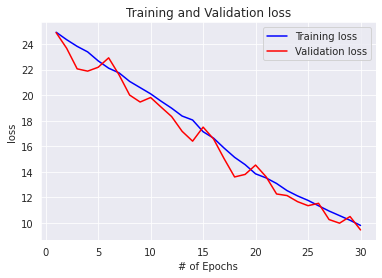


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 21ms/step - loss: 9.6268 - root_mean_squared_error: 3.1027 - val_loss: 8.5140 - val_root_mean_squared_error: 2.9179
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 9.1703 - root_mean_squared_error: 3.0282 - val_loss: 9.4590 - val_root_mean_squared_error: 3.0755
Epoch 3/40
5/5 [==============================] - 0s 9ms/step - loss: 8.7215 - root_mean_squared_error: 2.9532 - val_loss: 8.3901 - val_root_mean_squared_error: 2.8966
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 8.4901 - root_mean_squared_error: 2.9138 - val_loss: 7.8195 - val_root_mean_squared_error: 2.7963
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 8.1400 - root_mean_squared_error: 2.8531 - val_loss: 7.6722 - val_root_mean_squared_error: 2.7699
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 7.7189 - root_mean_squared_error: 2.7783 - val_loss: 8.1

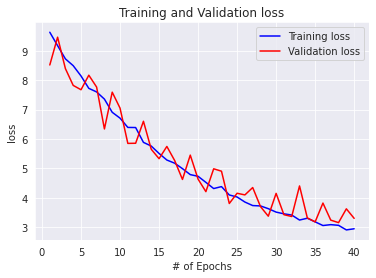

In [60]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i = model1_r.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i.history['loss']
  val_loss = history_i.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [61]:
# Model 1 Building with Relu with Regularization:

model1_r_l = tf.keras.Sequential()

model1_r_l.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model1_r_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="relu", name="HiddenLayer"))
model1_r_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model1_r_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model1_r_l.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer (Dense)         (None, 128)               1920      
                                                                 
 outputLayers (Dense)        (None, 1)                 129       
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________



Training Model(with Regularization) for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 43ms/step - loss: 104.4159 - root_mean_squared_error: 10.2060 - val_loss: 65.0167 - val_root_mean_squared_error: 8.0479
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 63.0011 - root_mean_squared_error: 7.9219 - val_loss: 53.0312 - val_root_mean_squared_error: 7.2658
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 51.3669 - root_mean_squared_error: 7.1506 - val_loss: 63.5575 - val_root_mean_squared_error: 7.9578
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 35.4976 - root_mean_squared_error: 5.9388 - val_loss: 23.0236 - val_root_mean_squared_error: 4.7749
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 35.2816 - root_mean_squared_error: 5.9211 - val_loss: 23.1799 - val_root_mean_squared_error: 4.7919
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 28.1324 - root_mean_squ

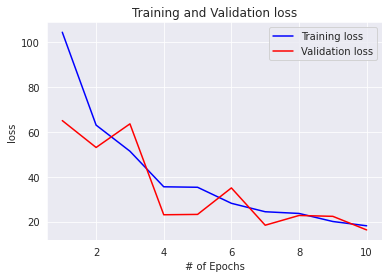


Training Model(with Regularization) for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 21ms/step - loss: 18.8050 - root_mean_squared_error: 4.3143 - val_loss: 18.5570 - val_root_mean_squared_error: 4.2858
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 15.8860 - root_mean_squared_error: 3.9621 - val_loss: 19.8931 - val_root_mean_squared_error: 4.4393
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 14.8987 - root_mean_squared_error: 3.8359 - val_loss: 13.6387 - val_root_mean_squared_error: 3.6682
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 14.0903 - root_mean_squared_error: 3.7294 - val_loss: 15.5435 - val_root_mean_squared_error: 3.9196
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 12.8387 - root_mean_squared_error: 3.5581 - val_loss: 12.4887 - val_root_mean_squared_error: 3.5088
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 12.2591 - root_mean_squar

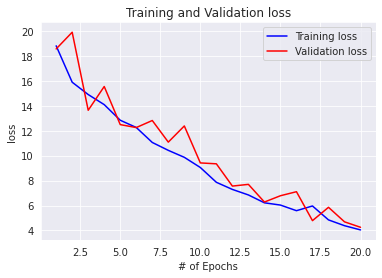


Training Model(with Regularization) for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 4.0827 - root_mean_squared_error: 1.9817 - val_loss: 8.6042 - val_root_mean_squared_error: 2.9067
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 5.0827 - root_mean_squared_error: 2.2198 - val_loss: 3.3415 - val_root_mean_squared_error: 1.7851
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 4.4130 - root_mean_squared_error: 2.0636 - val_loss: 3.1621 - val_root_mean_squared_error: 1.7343
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 3.7168 - root_mean_squared_error: 1.8875 - val_loss: 5.0731 - val_root_mean_squared_error: 2.2180
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 3.5466 - root_mean_squared_error: 1.8420 - val_loss: 3.8028 - val_root_mean_squared_error: 1.9104
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 3.1244 - root_mean_squared_error: 1

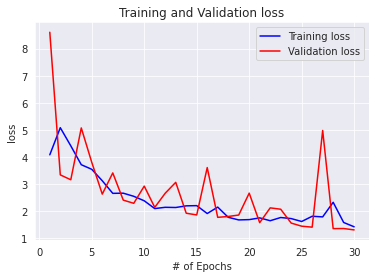


Training Model(with Regularization) for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 19ms/step - loss: 1.4206 - root_mean_squared_error: 1.1276 - val_loss: 1.2926 - val_root_mean_squared_error: 1.0693
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 1.3983 - root_mean_squared_error: 1.1176 - val_loss: 3.2176 - val_root_mean_squared_error: 1.7517
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 2.0544 - root_mean_squared_error: 1.3803 - val_loss: 1.3200 - val_root_mean_squared_error: 1.0821
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 1.4369 - root_mean_squared_error: 1.1348 - val_loss: 1.3807 - val_root_mean_squared_error: 1.1098
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 1.3716 - root_mean_squared_error: 1.1057 - val_loss: 1.7027 - val_root_mean_squared_error: 1.2465
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 1.3589 - root_mean_squared_error: 1

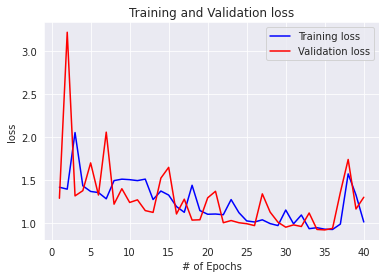

In [62]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model(with Regularization) for " , i , "Epochs: ")
  history_i_l = model1_r_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_l.history['loss']
  val_loss = history_i_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [63]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model1_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model1_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_r_l.evaluate(x_test,y_test)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 0.9211 - mse: 0.7741
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 0.9190 - mse: 0.7720
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 0.9199 - mse: 0.7730
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8794 - mse: 0.7324
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8737 - mse: 0.7268
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8716 - mse: 0.7248
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8717 - mse: 0.7249
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8711 - mse: 0.7243
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8685 - mse: 0.7217
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8667 - mse: 0.7199
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 0.8668 - mse: 0.7200
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 1.0528 - mse: 0.9071
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2036 - mse: 1.0581
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 0.9970 - mse: 0.8518
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 0.9277 - mse: 0.7828
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 0.9439 - mse: 0.7991
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 0.9095 - mse: 0.7650
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2385 - mse: 1.0943
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2756 - mse: 1.1316
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2706 - mse: 1.1268
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.1283 - mse: 0.9848
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.1291 - mse: 0.9857
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 25.8981 - mse: 25.7593
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 10.7300 - mse: 10.5925
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 4.2208 - mse: 4.0839
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 2.8324 - mse: 2.6960
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 4.5966 - mse: 4.4607
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 1.8726 - mse: 1.7370
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 1.4087 - mse: 1.2733
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 1.0547 - mse: 0.9195
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.0097 - mse: 0.8746
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 0.9961 - mse: 0.8612
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 0.8419 - mse: 0.7072
Epoc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 1691.6407 - mse: 1691.5126
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 563.6900 - mse: 563.5590
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 146.2589 - mse: 146.1219
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 68.4631 - mse: 68.3215
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 36.0784 - mse: 35.9342
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 30.7641 - mse: 30.6185
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 17.6700 - mse: 17.5234
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 17.2434 - mse: 17.0963
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 10.8220 - mse: 10.6743
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 9.0131 - mse: 8.8650
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 7.6

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 860.0654 - mse: 859.9348
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 71.5557 - mse: 71.3609
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 31.1459 - mse: 30.8823
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 25.9203 - mse: 25.6100
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 7.4297 - mse: 7.0923
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 9.6348 - mse: 9.2820
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 4.0256 - mse: 3.6643
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 2.9876 - mse: 2.6225
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 2.4829 - mse: 2.1164
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.9412 - mse: 1.5741
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2403 - mse: 0.873

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 45135.1211 - mse: 45134.6719
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 16411.0684 - mse: 16409.6094
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 892.0732 - mse: 889.6348
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 559.1367 - mse: 556.0582
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 99.8651 - mse: 96.4544
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 67.7252 - mse: 64.1555
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 57.3811 - mse: 53.7431
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 54.4887 - mse: 50.8262
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 54.5877 - mse: 50.9203
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 50.9282 - mse: 47.2650
Epoch 11/40
8/8 [==============================] - 0s 2ms/step -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 60434956.0000 - mse: 60434948.0000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 9962791.0000 - mse: 9962781.0000
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 14864935.0000 - mse: 14864916.0000
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 2510717.7500 - mse: 2510691.2500
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 384993.6250 - mse: 384962.9062
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 86744.5859 - mse: 86711.2500
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 7813.4795 - mse: 7778.8423
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 271.9091 - mse: 236.6474
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 272.6234 - mse: 237.0698
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 272.8051 - mse: 237.1172
Epoch 11/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 14319154176.0000 - mse: 14319154176.0000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 636644928.0000 - mse: 636644800.0000
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 317932224.0000 - mse: 317931968.0000
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 536525728.0000 - mse: 536525408.0000
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 121701968.0000 - mse: 121701560.0000
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 589.4697 - mse: 162.0813
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 604.5639 - mse: 164.9027
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 611.8165 - mse: 166.2678
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 615.1570 - mse: 166.8551
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 616.6754 - mse: 167.1

[537.6051025390625, 86.98155212402344]

In [64]:
history1_r = model1_r.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=25, epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 3.1027 - root_mean_squared_error: 1.7614 - val_loss: 3.6654 - val_root_mean_squared_error: 1.9145
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 2.8340 - root_mean_squared_error: 1.6834 - val_loss: 2.8335 - val_root_mean_squared_error: 1.6833
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 2.7470 - root_mean_squared_error: 1.6574 - val_loss: 3.4278 - val_root_mean_squared_error: 1.8514
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 2.8248 - root_mean_squared_error: 1.6807 - val_loss: 2.5313 - val_root_mean_squared_error: 1.5910
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 3.6119 - root_mean_squared_error: 1.9005 - val_loss: 3.6822 - val_root_mean_squared_error: 1.9189
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 2.6917 - root_mean_squared_error: 1.6406 - val_loss: 2.5560 - val_root_mean_squared_error

In [65]:
model1_r.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 3.2218 - root_mean_squared_error: 1.7949


[3.2218401432037354, 1.7949484586715698]

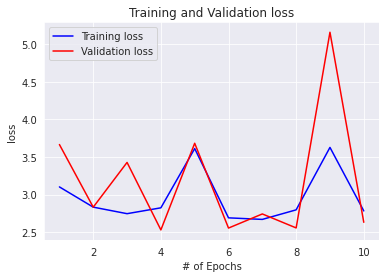

In [66]:
# Visualizing the training and validation loss against the epochs:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Get the details form the history object

loss1_r = history1_r.history['loss']
val_loss1_r = history1_r.history['val_loss']
epochs1_r = range(1, len(loss1_r) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs1_r, loss1_r, 'b', label='Training loss')
plt.plot(epochs1_r, val_loss1_r, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 3.4163 - root_mean_squared_error: 1.8483 - val_loss: 3.1878 - val_root_mean_squared_error: 1.7855
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 2.7176 - root_mean_squared_error: 1.6485 - val_loss: 3.3423 - val_root_mean_squared_error: 1.8282
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 2.5078 - root_mean_squared_error: 1.5836 - val_loss: 2.3507 - val_root_mean_squared_error: 1.5332
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 2.6854 - root_mean_squared_error: 1.6387 - val_loss: 3.2241 - val_root_mean_squared_error: 1.7956
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 2.4044 - root_mean_squared_error: 1.5506 - val_loss: 2.4605 - val_root_mean_squared_error: 1.5686
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 2.3937 - root_mean_squared_error: 1.5472 - val_loss: 2.7

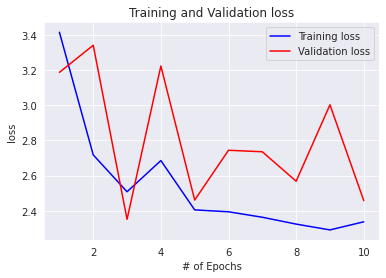


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 20ms/step - loss: 2.4173 - root_mean_squared_error: 1.5548 - val_loss: 2.4719 - val_root_mean_squared_error: 1.5722
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 2.2772 - root_mean_squared_error: 1.5091 - val_loss: 2.8539 - val_root_mean_squared_error: 1.6894
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 2.2494 - root_mean_squared_error: 1.4998 - val_loss: 2.4280 - val_root_mean_squared_error: 1.5582
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 2.2868 - root_mean_squared_error: 1.5122 - val_loss: 2.6367 - val_root_mean_squared_error: 1.6238
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 2.2287 - root_mean_squared_error: 1.4929 - val_loss: 2.6036 - val_root_mean_squared_error: 1.6136
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 2.2048 - root_mean_squared_error: 1.4848 - val_loss: 2.4

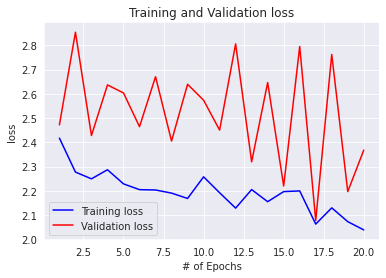


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 19ms/step - loss: 2.0037 - root_mean_squared_error: 1.4155 - val_loss: 2.3685 - val_root_mean_squared_error: 1.5390
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 1.9897 - root_mean_squared_error: 1.4106 - val_loss: 2.2954 - val_root_mean_squared_error: 1.5151
Epoch 3/30
5/5 [==============================] - 0s 12ms/step - loss: 1.9687 - root_mean_squared_error: 1.4031 - val_loss: 2.4502 - val_root_mean_squared_error: 1.5653
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 1.9717 - root_mean_squared_error: 1.4042 - val_loss: 2.1789 - val_root_mean_squared_error: 1.4761
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 1.9789 - root_mean_squared_error: 1.4067 - val_loss: 2.3508 - val_root_mean_squared_error: 1.5332
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 1.9814 - root_mean_squared_error: 1.4076 - val_loss: 2.

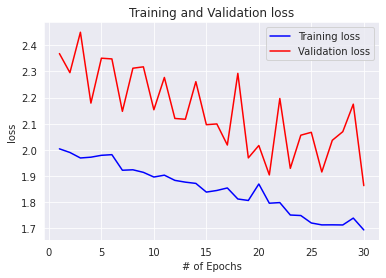


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 21ms/step - loss: 1.7179 - root_mean_squared_error: 1.3107 - val_loss: 2.0120 - val_root_mean_squared_error: 1.4185
Epoch 2/40
5/5 [==============================] - 0s 8ms/step - loss: 1.6863 - root_mean_squared_error: 1.2986 - val_loss: 2.0138 - val_root_mean_squared_error: 1.4191
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 1.6721 - root_mean_squared_error: 1.2931 - val_loss: 1.8934 - val_root_mean_squared_error: 1.3760
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 1.6592 - root_mean_squared_error: 1.2881 - val_loss: 1.8633 - val_root_mean_squared_error: 1.3650
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 1.6270 - root_mean_squared_error: 1.2756 - val_loss: 2.0708 - val_root_mean_squared_error: 1.4390
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 1.6126 - root_mean_squared_error: 1.2699 - val_loss: 1.7

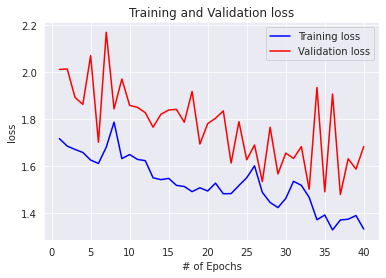

In [67]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i = model1_r.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i.history['loss']
  val_loss = history_i.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [68]:
# Model 1 with Building Sigmoid with Regularization:

model1_s_l = tf.keras.Sequential()

model1_s_l.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model1_s_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer"))
model1_s_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model1_s_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model1_s_l.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer (Dense)         (None, 128)               1920      
                                                                 
 outputLayers (Dense)        (None, 1)                 129       
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 42ms/step - loss: 437.3965 - root_mean_squared_error: 20.9079 - val_loss: 333.5142 - val_root_mean_squared_error: 18.2555
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 403.3255 - root_mean_squared_error: 20.0768 - val_loss: 317.0837 - val_root_mean_squared_error: 17.8002
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 386.3490 - root_mean_squared_error: 19.6498 - val_loss: 303.0729 - val_root_mean_squared_error: 17.4025
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 368.2497 - root_mean_squared_error: 19.1840 - val_loss: 282.4065 - val_root_mean_squared_error: 16.7985
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 345.3104 - root_mean_squared_error: 18.5768 - val_loss: 264.9378 - val_root_mean_squared_error: 16.2705
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 327.2874 - root_mean_squa

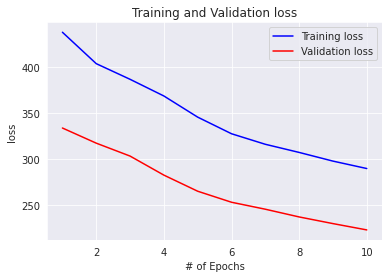


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 281.5429 - root_mean_squared_error: 16.7743 - val_loss: 216.3885 - val_root_mean_squared_error: 14.7047
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 274.0315 - root_mean_squared_error: 16.5491 - val_loss: 209.9536 - val_root_mean_squared_error: 14.4844
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 266.4633 - root_mean_squared_error: 16.3190 - val_loss: 203.7098 - val_root_mean_squared_error: 14.2674
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 259.2067 - root_mean_squared_error: 16.0953 - val_loss: 197.6367 - val_root_mean_squared_error: 14.0532
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 252.1105 - root_mean_squared_error: 15.8735 - val_loss: 191.7101 - val_root_mean_squared_error: 13.8409
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 244.7789 - root_mean_squar

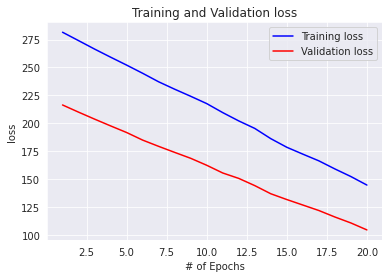


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 19ms/step - loss: 136.5582 - root_mean_squared_error: 11.6815 - val_loss: 98.8332 - val_root_mean_squared_error: 9.9364
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 129.5247 - root_mean_squared_error: 11.3765 - val_loss: 94.2763 - val_root_mean_squared_error: 9.7045
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 122.8152 - root_mean_squared_error: 11.0777 - val_loss: 88.6943 - val_root_mean_squared_error: 9.4125
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 115.9787 - root_mean_squared_error: 10.7647 - val_loss: 85.2033 - val_root_mean_squared_error: 9.2252
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 110.8581 - root_mean_squared_error: 10.5242 - val_loss: 81.9223 - val_root_mean_squared_error: 9.0457
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 105.8709 - root_mean_squared_error: 

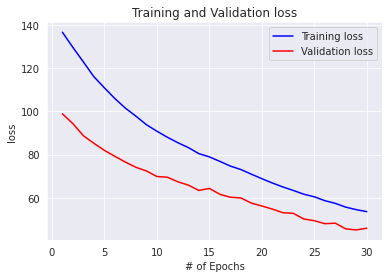


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 22ms/step - loss: 52.3590 - root_mean_squared_error: 7.2290 - val_loss: 42.3452 - val_root_mean_squared_error: 6.4996
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 50.9247 - root_mean_squared_error: 7.1291 - val_loss: 42.5289 - val_root_mean_squared_error: 6.5137
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 49.6976 - root_mean_squared_error: 7.0425 - val_loss: 41.1041 - val_root_mean_squared_error: 6.4034
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 48.7953 - root_mean_squared_error: 6.9781 - val_loss: 41.6231 - val_root_mean_squared_error: 6.4438
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 47.7816 - root_mean_squared_error: 6.9051 - val_loss: 39.2298 - val_root_mean_squared_error: 6.2553
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 46.8032 - root_mean_squared_error: 6.8339 - va

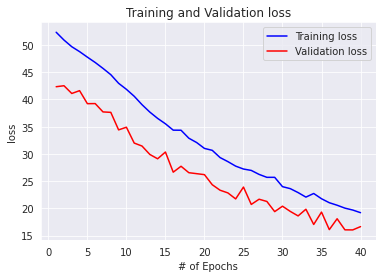

In [69]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_s_i_l = model1_s_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_s_i_l.history['loss']
  val_loss = history_s_i_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [70]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model1_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model1_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model1_s_l.evaluate(x_test,y_test)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 18.6371 - mse: 18.5296
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 18.5188 - mse: 18.4114
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 18.4503 - mse: 18.3430
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 18.3721 - mse: 18.2649
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 18.3224 - mse: 18.2152
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 18.2949 - mse: 18.1879
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 18.2848 - mse: 18.1779
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 18.2740 - mse: 18.1671
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 18.2656 - mse: 18.1588
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 18.2575 - mse: 18.1508
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 18.2494 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 18.0204 - mse: 17.9164
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 17.8373 - mse: 17.7341
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 17.7399 - mse: 17.6375
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 17.5576 - mse: 17.4559
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 17.5289 - mse: 17.4280
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 17.2556 - mse: 17.1555
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 17.1401 - mse: 17.0408
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 16.8956 - mse: 16.7970
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 16.7005 - mse: 16.6026
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 16.4398 - mse: 16.3426
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 16.5301 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 11.8313 - mse: 11.7485
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 10.5016 - mse: 10.4224
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 11.0726 - mse: 10.9965
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 10.3829 - mse: 10.3096
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 9.2623 - mse: 9.1911
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 7.8520 - mse: 7.7826
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 7.1870 - mse: 7.1192
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 6.5804 - mse: 6.5140
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 6.7864 - mse: 6.7211
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 5.9580 - mse: 5.8936
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 5.3357 - mse: 5.2720


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 131.9306 - mse: 131.8569
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 56.9185 - mse: 56.8240
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 50.4914 - mse: 50.3781
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 41.2277 - mse: 41.0991
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 46.5619 - mse: 46.4218
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 36.1624 - mse: 36.0094
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 24.6449 - mse: 24.4772
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 18.3517 - mse: 18.1658
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 13.5081 - mse: 13.3033
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 8.7355 - mse: 8.5136
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 7.4975 - 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 135.0216 - mse: 134.7162
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 60.4429 - mse: 60.0711
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 51.1124 - mse: 50.6390
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 43.1756 - mse: 42.6318
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 35.0159 - mse: 34.4262
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 31.8276 - mse: 31.2124
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 27.3999 - mse: 26.7708
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 23.6503 - mse: 23.0169
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 21.3151 - mse: 20.6800
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 17.5218 - mse: 16.8856
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 16.0972

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 165.8989 - mse: 165.1125
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 94.3614 - mse: 93.0318
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 80.4216 - mse: 78.2941
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 82.3614 - mse: 79.7145
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 87.3179 - mse: 84.4383
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 87.2226 - mse: 84.3312
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 81.6024 - mse: 78.7527
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 85.6087 - mse: 82.8146
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 86.6186 - mse: 83.8998
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 78.3590 - mse: 75.7419
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 77.6363

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 218.5408 - mse: 217.1763
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 400.0425 - mse: 396.3249
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 91.2617 - mse: 84.3479
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 197.5348 - mse: 187.1489
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 135.9760 - mse: 121.6062
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 254.5161 - mse: 236.5650
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 331.5439 - mse: 309.0672
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 235.9743 - mse: 208.6513
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 152.8468 - mse: 121.4158
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 151.6797 - mse: 115.2304
Epoch 11/40
8/8 [==============================] - 0s 2ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 656.1113 - mse: 639.0671
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 2203.8591 - mse: 2198.2485
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 11704.2334 - mse: 11699.3311
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 9007.0469 - mse: 8999.1816
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 16025.5771 - mse: 16011.9023
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 10812.3789 - mse: 10787.4326
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 5269.6802 - mse: 5202.7661
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 16560.9180 - mse: 16432.7305
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 9820.2744 - mse: 9628.7188
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 5534.5620 - mse: 5284.9648
Epoch 11/40
8/8 [=================

[1262.1585693359375, 52.152793884277344]

In [71]:
# Model 1 with Building Sigmoid:

model1_s = tf.keras.Sequential()

model1_s.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model1_s.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer"))
model1_s.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model1_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model1_s.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer (Dense)         (None, 128)               1920      
                                                                 
 outputLayers (Dense)        (None, 1)                 129       
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 40ms/step - loss: 450.8364 - root_mean_squared_error: 21.2329 - val_loss: 347.5247 - val_root_mean_squared_error: 18.6420
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 414.8793 - root_mean_squared_error: 20.3686 - val_loss: 319.8960 - val_root_mean_squared_error: 17.8856
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 386.4581 - root_mean_squared_error: 19.6585 - val_loss: 297.9632 - val_root_mean_squared_error: 17.2616
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 362.9820 - root_mean_squared_error: 19.0521 - val_loss: 279.7672 - val_root_mean_squared_error: 16.7262
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 342.2536 - root_mean_squared_error: 18.5001 - val_loss: 258.5657 - val_root_mean_squared_error: 16.0800
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 316.3430 - root_mean_squar

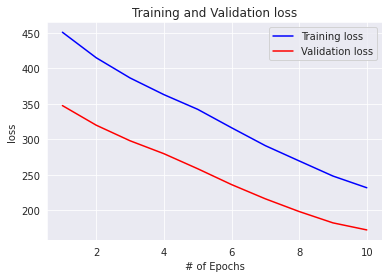


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 221.0211 - root_mean_squared_error: 14.8668 - val_loss: 162.6889 - val_root_mean_squared_error: 12.7550
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 209.4695 - root_mean_squared_error: 14.4731 - val_loss: 153.6501 - val_root_mean_squared_error: 12.3956
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 198.4454 - root_mean_squared_error: 14.0871 - val_loss: 145.9400 - val_root_mean_squared_error: 12.0806
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 189.9370 - root_mean_squared_error: 13.7818 - val_loss: 140.4372 - val_root_mean_squared_error: 11.8506
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 183.1025 - root_mean_squared_error: 13.5315 - val_loss: 135.2396 - val_root_mean_squared_error: 11.6293
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 176.7742 - root_mean_squar

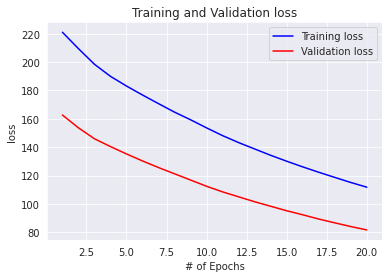


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 18ms/step - loss: 108.6221 - root_mean_squared_error: 10.4222 - val_loss: 79.3441 - val_root_mean_squared_error: 8.9075
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 105.5050 - root_mean_squared_error: 10.2716 - val_loss: 76.8184 - val_root_mean_squared_error: 8.7646
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 102.4464 - root_mean_squared_error: 10.1216 - val_loss: 74.5371 - val_root_mean_squared_error: 8.6335
Epoch 4/30
5/5 [==============================] - 0s 8ms/step - loss: 99.5064 - root_mean_squared_error: 9.9753 - val_loss: 72.3669 - val_root_mean_squared_error: 8.5069
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 96.7642 - root_mean_squared_error: 9.8369 - val_loss: 70.6785 - val_root_mean_squared_error: 8.4070
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 94.0451 - root_mean_squared_error: 9.697

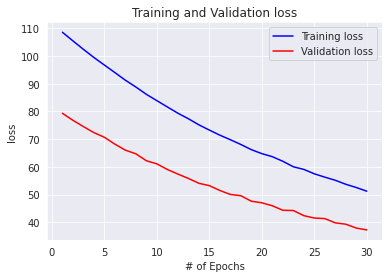


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 19ms/step - loss: 50.0952 - root_mean_squared_error: 7.0778 - val_loss: 36.2205 - val_root_mean_squared_error: 6.0183
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 48.7353 - root_mean_squared_error: 6.9811 - val_loss: 35.4259 - val_root_mean_squared_error: 5.9520
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 47.4868 - root_mean_squared_error: 6.8911 - val_loss: 34.5156 - val_root_mean_squared_error: 5.8750
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 46.3989 - root_mean_squared_error: 6.8117 - val_loss: 33.5805 - val_root_mean_squared_error: 5.7949
Epoch 5/40
5/5 [==============================] - 0s 10ms/step - loss: 45.4441 - root_mean_squared_error: 6.7412 - val_loss: 32.9116 - val_root_mean_squared_error: 5.7369
Epoch 6/40
5/5 [==============================] - 0s 10ms/step - loss: 44.3709 - root_mean_squared_error: 6.6611 - 

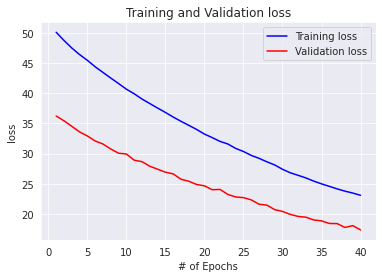

In [72]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i = model1_s.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i.history['loss']
  val_loss = history_i.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [73]:
history1_s = model1_s.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=25, epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 22.8941 - root_mean_squared_error: 4.7848 - val_loss: 17.2898 - val_root_mean_squared_error: 4.1581
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 22.9372 - root_mean_squared_error: 4.7893 - val_loss: 16.4897 - val_root_mean_squared_error: 4.0608
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 22.0265 - root_mean_squared_error: 4.6932 - val_loss: 17.7139 - val_root_mean_squared_error: 4.2088
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 21.9364 - root_mean_squared_error: 4.6836 - val_loss: 16.4331 - val_root_mean_squared_error: 4.0538
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 20.9883 - root_mean_squared_error: 4.5813 - val_loss: 15.9281 - val_root_mean_squared_error: 3.9910
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 20.1764 - root_mean_squared_error: 4.4918 - val_loss: 15.1459 - val_root_mean_s

In [74]:
model1_s.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 5.2721 - root_mean_squared_error: 2.2961


[5.272065162658691, 2.296097755432129]

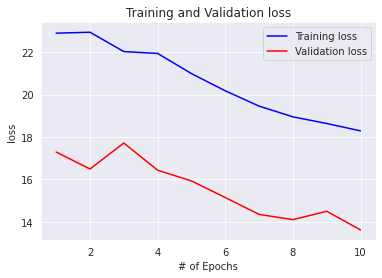

In [75]:
# Visualizing the training and validation loss against the epochs:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Get the details form the history object

loss1_s = history1_s.history['loss']
val_loss1_s = history1_s.history['val_loss']
epochs1_s = range(1, len(loss1_s) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs1_s, loss1_s, 'b', label='Training loss')
plt.plot(epochs1_s, val_loss1_s, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [76]:
# var_l_rate = [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1]

# for i in var_l_rate:
#   history = model1_s.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=10, callbacks=[tf.keras.callbacks.LearningRateScheduler(lamda i : i)])

In [77]:
# Model 2 Building with Relu with Regularization:

model2_r_l = tf.keras.Sequential()

model2_r_l.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model2_r_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="relu", name="HiddenLayer1"))
model2_r_l.add(tf.keras.layers.Dense(64, kernel_regularizer='l2', activation="relu", name="HiddenLayer2"))
model2_r_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model2_r_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model2_r_l.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 outputLayers (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 130ms/step - loss: 288.4846 - root_mean_squared_error: 16.9524 - val_loss: 232.4458 - val_root_mean_squared_error: 15.2112
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 159.5072 - root_mean_squared_error: 12.5881 - val_loss: 53.0077 - val_root_mean_squared_error: 7.2107
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 68.8246 - root_mean_squared_error: 8.2358 - val_loss: 66.3509 - val_root_mean_squared_error: 8.0862
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 71.1863 - root_mean_squared_error: 8.3808 - val_loss: 37.2885 - val_root_mean_squared_error: 6.0306
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 47.1616 - root_mean_squared_error: 6.8012 - val_loss: 67.4530 - val_root_mean_squared_error: 8.1593
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 40.1707 - root_mean_squared_error: 6.2

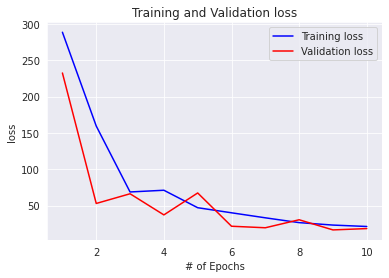


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 20.9945 - root_mean_squared_error: 4.5038 - val_loss: 21.3201 - val_root_mean_squared_error: 4.5416
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 18.5748 - root_mean_squared_error: 4.2295 - val_loss: 12.5568 - val_root_mean_squared_error: 3.4475
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 16.3445 - root_mean_squared_error: 3.9598 - val_loss: 18.8167 - val_root_mean_squared_error: 4.2621
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 14.7283 - root_mean_squared_error: 3.7529 - val_loss: 11.9070 - val_root_mean_squared_error: 3.3578
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 13.0296 - root_mean_squared_error: 3.5219 - val_loss: 15.0136 - val_root_mean_squared_error: 3.7946
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 12.6662 - root_mean_squared_error: 3.4723 - va

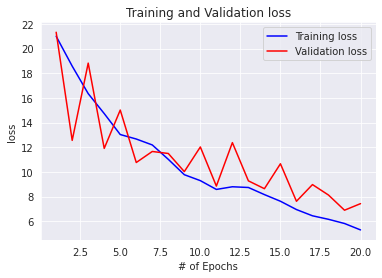


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 19ms/step - loss: 5.0298 - root_mean_squared_error: 2.1328 - val_loss: 7.7099 - val_root_mean_squared_error: 2.6891
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 4.9994 - root_mean_squared_error: 2.1265 - val_loss: 5.9611 - val_root_mean_squared_error: 2.3422
Epoch 3/30
5/5 [==============================] - 0s 11ms/step - loss: 4.7315 - root_mean_squared_error: 2.0633 - val_loss: 6.6951 - val_root_mean_squared_error: 2.4945
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 4.3997 - root_mean_squared_error: 1.9820 - val_loss: 6.1015 - val_root_mean_squared_error: 2.3731
Epoch 5/30
5/5 [==============================] - 0s 7ms/step - loss: 4.1378 - root_mean_squared_error: 1.9154 - val_loss: 5.5526 - val_root_mean_squared_error: 2.2550
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 3.9890 - root_mean_squared_error: 1.8768 - val_loss: 4.

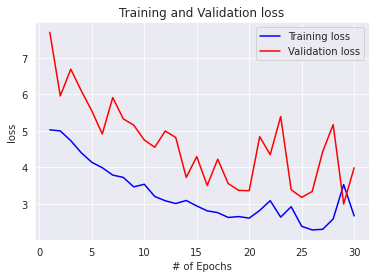


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 19ms/step - loss: 3.3411 - root_mean_squared_error: 1.7011 - val_loss: 3.0917 - val_root_mean_squared_error: 1.6262
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 2.9330 - root_mean_squared_error: 1.5767 - val_loss: 6.3981 - val_root_mean_squared_error: 2.4396
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 3.1203 - root_mean_squared_error: 1.6352 - val_loss: 4.2442 - val_root_mean_squared_error: 1.9488
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 2.2004 - root_mean_squared_error: 1.3244 - val_loss: 2.8684 - val_root_mean_squared_error: 1.5564
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 2.1450 - root_mean_squared_error: 1.3035 - val_loss: 3.0361 - val_root_mean_squared_error: 1.6094
Epoch 6/40
5/5 [==============================] - 0s 9ms/step - loss: 2.0283 - root_mean_squared_error: 1.2580 - val_loss: 3.7

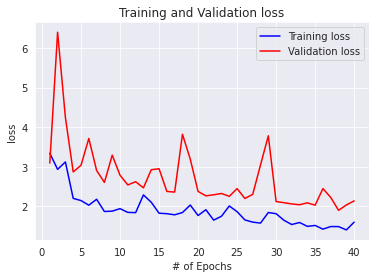

In [78]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_2_r_l = model2_r_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_2_r_l.history['loss']
  val_loss = history_i_2_r_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [79]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model2_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model2_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_r_l.evaluate(x_test,y_test)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 1.4837 - mse: 1.0446
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3403 - mse: 0.9013
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 1.3417 - mse: 0.9030
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3389 - mse: 0.9003
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3396 - mse: 0.9011
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3364 - mse: 0.8981
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3349 - mse: 0.8968
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3370 - mse: 0.8991
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3397 - mse: 0.9020
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3331 - mse: 0.8955
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 1.3651 - mse: 0.9277
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 1.8280 - mse: 1.3963
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 1.7085 - mse: 1.2785
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 1.8047 - mse: 1.3764
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 1.5484 - mse: 1.1216
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2969 - mse: 0.8716
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 1.3153 - mse: 0.8915
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3356 - mse: 0.9133
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3041 - mse: 0.8832
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3280 - mse: 0.9085
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.6834 - mse: 1.2652
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3822 - mse: 0.9653
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 54.4380 - mse: 54.0554
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 19.6831 - mse: 19.3090
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 7.1463 - mse: 6.7786
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 4.8159 - mse: 4.4530
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 2.7778 - mse: 2.4187
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 2.5600 - mse: 2.2041
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 2.3727 - mse: 2.0194
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 2.3173 - mse: 1.9662
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.9540 - mse: 1.6048
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.7280 - mse: 1.3804
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.6054 - mse: 1.2591
Epoc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 1582.1906 - mse: 1581.8536
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 64.4176 - mse: 64.0372
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 46.3902 - mse: 45.9604
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 37.6715 - mse: 37.2119
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 16.0421 - mse: 15.5638
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 12.5161 - mse: 12.0260
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 16.7313 - mse: 16.2378
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 11.6865 - mse: 11.1936
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 8.5797 - mse: 8.0886
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 8.6637 - mse: 8.1734
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 5.5400 - 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 850.3077 - mse: 849.9902
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 101.3434 - mse: 100.7078
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 105.7330 - mse: 104.7752
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 50.7290 - mse: 49.5806
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 50.2423 - mse: 49.0093
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 64.2868 - mse: 63.0322
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 63.3500 - mse: 62.1060
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 48.7055 - mse: 47.4853
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 53.8033 - mse: 52.6112
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 35.1448 - mse: 33.9808
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 13.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 129108.7422 - mse: 129107.5000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 163853.0000 - mse: 163846.1406
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 497.7725 - mse: 485.2796
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 180.5139 - mse: 164.4914
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 104.9877 - mse: 87.0934
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 102.8769 - mse: 84.0744
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 102.7912 - mse: 83.5785
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 96.0372 - mse: 76.6574
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 91.6619 - mse: 72.2295
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 89.4469 - mse: 70.0146
Epoch 11/40
8/8 [==============================] - 0s 2ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 1126686720.0000 - mse: 1126686592.0000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 71626568.0000 - mse: 71626528.0000
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 113058272.0000 - mse: 113058184.0000
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 32707834.0000 - mse: 32707694.0000
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 123502.8438 - mse: 123339.4062
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 625.1736 - mse: 448.0676
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 632.9261 - mse: 449.0040
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 636.5391 - mse: 449.3849
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 638.1505 - mse: 449.5150
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 638.8031 - mse: 449.5145
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 6344075640832.0000 - mse: 6344075640832.0000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 73538215936.0000 - mse: 73538215936.0000
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 1766.4249 - mse: 515.2765
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 2181.4038 - mse: 536.5439
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 2399.5459 - mse: 547.0150
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 2507.5557 - mse: 552.0341
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 2559.2861 - mse: 554.3860
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 2583.5681 - mse: 555.4808
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 2594.8008 - mse: 555.9749
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 2599.9521 - mse: 556.2003
Epoch 11/40
8/8 

[2462.46875, 414.651123046875]

In [80]:
# Model 2 Building with Relu:

model2_r = tf.keras.Sequential()

model2_r.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model2_r.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model2_r.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
model2_r.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model2_r.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model2_r.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 outputLayers (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 40ms/step - loss: 451.9275 - root_mean_squared_error: 21.2586 - val_loss: 450.0886 - val_root_mean_squared_error: 21.2153
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 295.9332 - root_mean_squared_error: 17.2027 - val_loss: 105.2545 - val_root_mean_squared_error: 10.2594
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 98.7972 - root_mean_squared_error: 9.9397 - val_loss: 118.5950 - val_root_mean_squared_error: 10.8901
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 145.1215 - root_mean_squared_error: 12.0466 - val_loss: 51.3529 - val_root_mean_squared_error: 7.1661
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 65.2757 - root_mean_squared_error: 8.0793 - val_loss: 108.7988 - val_root_mean_squared_error: 10.4307
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 76.9772 - root_mean_squared_erro

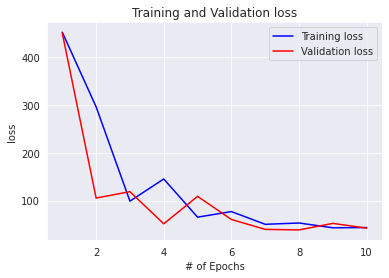


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 20ms/step - loss: 38.6029 - root_mean_squared_error: 6.2131 - val_loss: 33.8036 - val_root_mean_squared_error: 5.8141
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 37.6889 - root_mean_squared_error: 6.1391 - val_loss: 33.4791 - val_root_mean_squared_error: 5.7861
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 34.5020 - root_mean_squared_error: 5.8738 - val_loss: 38.0175 - val_root_mean_squared_error: 6.1658
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 34.0975 - root_mean_squared_error: 5.8393 - val_loss: 31.6125 - val_root_mean_squared_error: 5.6225
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 32.0366 - root_mean_squared_error: 5.6601 - val_loss: 26.3864 - val_root_mean_squared_error: 5.1368
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 30.1563 - root_mean_squared_error: 5.4915 - va

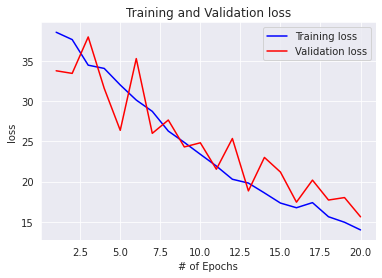


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 19ms/step - loss: 14.1076 - root_mean_squared_error: 3.7560 - val_loss: 18.0301 - val_root_mean_squared_error: 4.2462
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 12.5650 - root_mean_squared_error: 3.5447 - val_loss: 14.3849 - val_root_mean_squared_error: 3.7927
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 11.5182 - root_mean_squared_error: 3.3938 - val_loss: 14.9818 - val_root_mean_squared_error: 3.8706
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 11.0672 - root_mean_squared_error: 3.3267 - val_loss: 14.8044 - val_root_mean_squared_error: 3.8476
Epoch 5/30
5/5 [==============================] - 0s 7ms/step - loss: 10.7847 - root_mean_squared_error: 3.2840 - val_loss: 12.6611 - val_root_mean_squared_error: 3.5582
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 9.8552 - root_mean_squared_error: 3.1393 - val

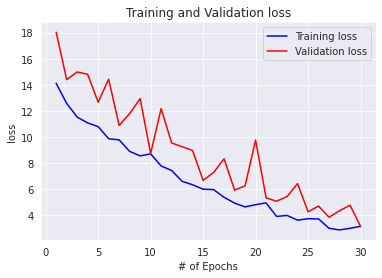


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 19ms/step - loss: 3.1219 - root_mean_squared_error: 1.7669 - val_loss: 3.0362 - val_root_mean_squared_error: 1.7425
Epoch 2/40
5/5 [==============================] - 0s 8ms/step - loss: 2.8629 - root_mean_squared_error: 1.6920 - val_loss: 2.9984 - val_root_mean_squared_error: 1.7316
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 2.6586 - root_mean_squared_error: 1.6305 - val_loss: 3.1171 - val_root_mean_squared_error: 1.7655
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 2.5038 - root_mean_squared_error: 1.5823 - val_loss: 3.8931 - val_root_mean_squared_error: 1.9731
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 2.3033 - root_mean_squared_error: 1.5177 - val_loss: 2.7808 - val_root_mean_squared_error: 1.6676
Epoch 6/40
5/5 [==============================] - 0s 8ms/step - loss: 2.1515 - root_mean_squared_error: 1.4668 - val_loss: 2.7

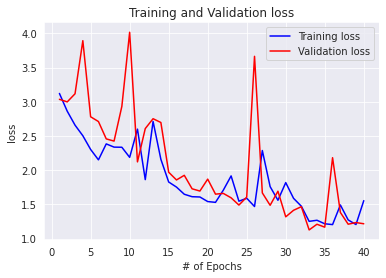

In [81]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_2_r = model2_r.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_2_r.history['loss']
  val_loss = history_i_2_r.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [82]:
# Model 2 with Building Sigmoid with Regularization:

model2_s_l = tf.keras.Sequential()

model2_s_l.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model2_s_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer1"))
model2_s_l.add(tf.keras.layers.Dense(64, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer2"))
model2_s_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model2_s_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model2_s_l.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 outputLayers (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 43ms/step - loss: 512.1044 - root_mean_squared_error: 22.6056 - val_loss: 398.2272 - val_root_mean_squared_error: 19.9289
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 469.8383 - root_mean_squared_error: 21.6514 - val_loss: 366.2054 - val_root_mean_squared_error: 19.1095
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 436.3088 - root_mean_squared_error: 20.8636 - val_loss: 338.2235 - val_root_mean_squared_error: 18.3636
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 405.5034 - root_mean_squared_error: 20.1125 - val_loss: 313.8009 - val_root_mean_squared_error: 17.6869
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 380.3280 - root_mean_squared_error: 19.4772 - val_loss: 294.8228 - val_root_mean_squared_error: 17.1426
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 360.3275 - root_mean_squa

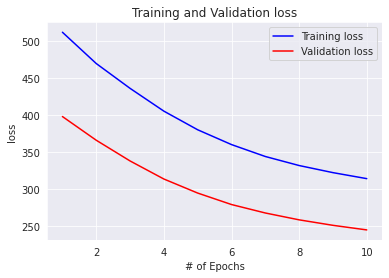


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 307.5194 - root_mean_squared_error: 17.5111 - val_loss: 239.6177 - val_root_mean_squared_error: 15.4513
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 301.5544 - root_mean_squared_error: 17.3402 - val_loss: 234.7220 - val_root_mean_squared_error: 15.2923
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 295.9306 - root_mean_squared_error: 17.1775 - val_loss: 230.2108 - val_root_mean_squared_error: 15.1444
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 290.8075 - root_mean_squared_error: 17.0280 - val_loss: 225.9024 - val_root_mean_squared_error: 15.0017
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 286.0165 - root_mean_squared_error: 16.8869 - val_loss: 221.7191 - val_root_mean_squared_error: 14.8619
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 281.0238 - root_mean_squar

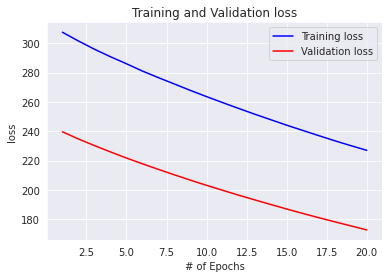


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 223.6622 - root_mean_squared_error: 14.9275 - val_loss: 170.0553 - val_root_mean_squared_error: 13.0084
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 220.5878 - root_mean_squared_error: 14.8240 - val_loss: 167.4707 - val_root_mean_squared_error: 12.9085
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 217.3518 - root_mean_squared_error: 14.7143 - val_loss: 165.0461 - val_root_mean_squared_error: 12.8141
Epoch 4/30
5/5 [==============================] - 0s 8ms/step - loss: 214.5106 - root_mean_squared_error: 14.6172 - val_loss: 162.5809 - val_root_mean_squared_error: 12.7173
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 211.5412 - root_mean_squared_error: 14.5151 - val_loss: 160.1952 - val_root_mean_squared_error: 12.6229
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 208.6912 - root_mean_squar

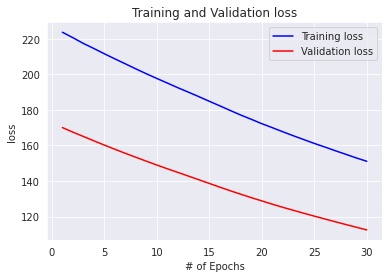


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 20ms/step - loss: 149.1161 - root_mean_squared_error: 12.1716 - val_loss: 111.0613 - val_root_mean_squared_error: 10.4926
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 147.2259 - root_mean_squared_error: 12.0938 - val_loss: 109.6915 - val_root_mean_squared_error: 10.4273
Epoch 3/40
5/5 [==============================] - 0s 9ms/step - loss: 145.4516 - root_mean_squared_error: 12.0204 - val_loss: 108.3637 - val_root_mean_squared_error: 10.3636
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 143.7234 - root_mean_squared_error: 11.9484 - val_loss: 107.0533 - val_root_mean_squared_error: 10.3003
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 141.9660 - root_mean_squared_error: 11.8748 - val_loss: 105.7813 - val_root_mean_squared_error: 10.2385
Epoch 6/40
5/5 [==============================] - 0s 8ms/step - loss: 140.3057 - root_mean_squar

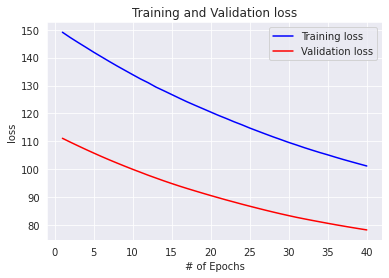

In [83]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_2_s_l = model2_s_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_2_s_l.history['loss']
  val_loss = history_i_2_s_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [84]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model2_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model2_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model2_s_l.evaluate(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
8/8 [==============================] - 0s 2ms/step - loss: 100.6283 - mse: 99.7606
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 100.6053 - mse: 99.7385
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 100.5858 - mse: 99.7200
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 100.5659 - mse: 99.7010
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 100.5444 - mse: 99.6803
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 100.5227 - mse: 99.6596
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 100.5027 - mse: 99.6405
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 100.4815 - mse: 99.6201
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 100.4611 - mse: 99.6005
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 100.4404 - mse: 99.5808
Epoch 11/40
8/8 [==============================] - 0s 2ms/s

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 99.7229 - mse: 98.8905
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 99.4934 - mse: 98.6694
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 99.3002 - mse: 98.4845
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 99.0924 - mse: 98.2854
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 98.9103 - mse: 98.1122
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 98.7184 - mse: 97.9277
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 98.4944 - mse: 97.7101
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 98.2785 - mse: 97.5000
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 98.0634 - mse: 97.2904
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 97.8691 - mse: 97.1016
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 97.6800 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 91.6827 - mse: 91.0931
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 89.8612 - mse: 89.3022
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 88.2167 - mse: 87.6957
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 86.6030 - mse: 86.1182
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 85.2424 - mse: 84.7966
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 84.1932 - mse: 83.7847
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 83.1112 - mse: 82.7369
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 82.0430 - mse: 81.6979
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 80.9101 - mse: 80.5720
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 79.9310 - mse: 79.5982
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 79.0873 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 78.3097 - mse: 77.6830
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 76.8763 - mse: 76.3107
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 76.6686 - mse: 76.1799
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 76.3002 - mse: 75.7980
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 76.5361 - mse: 76.0487
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 75.6281 - mse: 75.1471
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 76.4002 - mse: 75.9050
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 77.2053 - mse: 76.7370
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 75.4385 - mse: 75.0498
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 74.9150 - mse: 74.5493
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 73.7675 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 206.0831 - mse: 203.3016
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 92.0195 - mse: 88.6507
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 70.3323 - mse: 66.2658
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 56.2903 - mse: 51.8618
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 50.9482 - mse: 46.3680
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 78.1633 - mse: 73.4985
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 86.8007 - mse: 82.0700
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 70.6095 - mse: 65.8896
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 54.0301 - mse: 49.3425
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 39.9381 - mse: 35.2515
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 30.7663

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 132.3085 - mse: 129.4635
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 86.0676 - mse: 77.7717
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 89.8120 - mse: 77.4404
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 92.1323 - mse: 78.6808
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 88.4032 - mse: 75.3224
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 97.1032 - mse: 85.0783
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 86.5119 - mse: 75.6752
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 86.7517 - mse: 77.0808
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 93.2382 - mse: 84.5748
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 89.9832 - mse: 82.3597
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 84.9686

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 125.1108 - mse: 115.8327
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 140.4880 - mse: 105.5688
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 124.0229 - mse: 78.4963
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 121.5168 - mse: 75.7384
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 126.7876 - mse: 84.7273
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 126.6540 - mse: 83.5892
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 125.5283 - mse: 80.5452
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 124.1882 - mse: 77.6855
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 137.0660 - mse: 90.5771
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 124.5894 - mse: 78.2722
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - los

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 332.4180 - mse: 274.6186
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 288.1880 - mse: 108.5809
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 453.3188 - mse: 118.2885
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 505.7465 - mse: 91.7137
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 480.7349 - mse: 83.3003
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 440.2941 - mse: 86.5283
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 411.5216 - mse: 82.1258
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 529.6965 - mse: 214.1486
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 484.5147 - mse: 132.6732
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 502.4602 - mse: 103.1170
Epoch 11/40
8/8 [==============================] - 0s 2ms/step -

[524.935546875, 39.66439437866211]

In [85]:
# Model 2 with Building Sigmoid:

model2_s = tf.keras.Sequential()

model2_s.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model2_s.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1"))
model2_s.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2"))
model2_s.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model2_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model2_s.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 outputLayers (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 44ms/step - loss: 386.4794 - root_mean_squared_error: 19.6591 - val_loss: 293.1575 - val_root_mean_squared_error: 17.1218
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 353.2444 - root_mean_squared_error: 18.7948 - val_loss: 263.0076 - val_root_mean_squared_error: 16.2175
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 321.0765 - root_mean_squared_error: 17.9186 - val_loss: 240.0683 - val_root_mean_squared_error: 15.4941
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 295.5790 - root_mean_squared_error: 17.1924 - val_loss: 219.2837 - val_root_mean_squared_error: 14.8082
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 271.9146 - root_mean_squared_error: 16.4898 - val_loss: 200.4368 - val_root_mean_squared_error: 14.1576
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 252.4081 - root_mean_squar

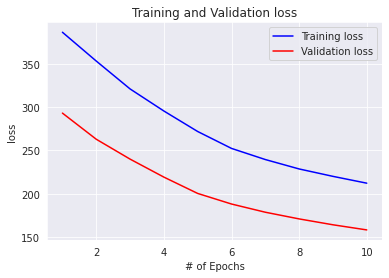


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 20ms/step - loss: 205.3428 - root_mean_squared_error: 14.3298 - val_loss: 153.1730 - val_root_mean_squared_error: 12.3763
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 199.0752 - root_mean_squared_error: 14.1094 - val_loss: 148.4661 - val_root_mean_squared_error: 12.1847
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 193.6075 - root_mean_squared_error: 13.9143 - val_loss: 143.9576 - val_root_mean_squared_error: 11.9982
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 188.3662 - root_mean_squared_error: 13.7247 - val_loss: 139.8133 - val_root_mean_squared_error: 11.8243
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 183.2465 - root_mean_squared_error: 13.5369 - val_loss: 136.0533 - val_root_mean_squared_error: 11.6642
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 178.6504 - root_mean_squar

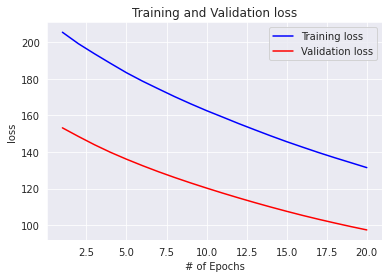


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 21ms/step - loss: 128.9273 - root_mean_squared_error: 11.3546 - val_loss: 95.6865 - val_root_mean_squared_error: 9.7819
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 126.6042 - root_mean_squared_error: 11.2519 - val_loss: 93.9234 - val_root_mean_squared_error: 9.6914
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 124.2529 - root_mean_squared_error: 11.1469 - val_loss: 92.1930 - val_root_mean_squared_error: 9.6017
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 121.7644 - root_mean_squared_error: 11.0347 - val_loss: 90.6160 - val_root_mean_squared_error: 9.5192
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 119.5055 - root_mean_squared_error: 10.9319 - val_loss: 89.1628 - val_root_mean_squared_error: 9.4426
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 117.4576 - root_mean_squared_error: 

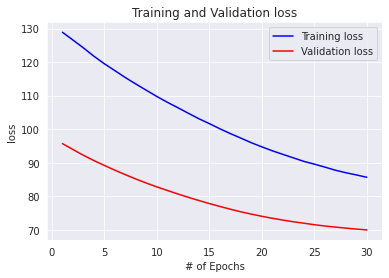


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 19ms/step - loss: 84.9112 - root_mean_squared_error: 9.2147 - val_loss: 69.6946 - val_root_mean_squared_error: 8.3483
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 84.3266 - root_mean_squared_error: 9.1830 - val_loss: 69.4893 - val_root_mean_squared_error: 8.3360
Epoch 3/40
5/5 [==============================] - 0s 9ms/step - loss: 83.6254 - root_mean_squared_error: 9.1447 - val_loss: 69.3063 - val_root_mean_squared_error: 8.3250
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 83.1236 - root_mean_squared_error: 9.1172 - val_loss: 69.1464 - val_root_mean_squared_error: 8.3154
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 82.5662 - root_mean_squared_error: 9.0866 - val_loss: 69.0042 - val_root_mean_squared_error: 8.3069
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 82.0618 - root_mean_squared_error: 9.0588 - va

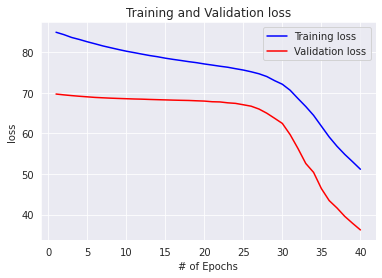

In [86]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_2_s = model2_s.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_2_s.history['loss']
  val_loss = history_i_2_s.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [87]:
# Model 3 Building with Relu with Regularization:

model3_r_l = tf.keras.Sequential()

model3_r_l.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model3_r_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="relu", name="HiddenLayer1"))
model3_r_l.add(tf.keras.layers.Dense(64, kernel_regularizer='l2', activation="relu", name="HiddenLayer2"))
model3_r_l.add(tf.keras.layers.Dense(32, kernel_regularizer='l2', activation="relu", name="HiddenLayer3"))
model3_r_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model3_r_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model3_r_l.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 outputLayers (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,499
Trainable params: 12,499
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 53ms/step - loss: 224.2163 - root_mean_squared_error: 14.9239 - val_loss: 191.1511 - val_root_mean_squared_error: 13.7734
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 104.9431 - root_mean_squared_error: 10.1745 - val_loss: 49.0081 - val_root_mean_squared_error: 6.9015
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 59.9305 - root_mean_squared_error: 7.6535 - val_loss: 44.0947 - val_root_mean_squared_error: 6.5407
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 53.3331 - root_mean_squared_error: 7.2139 - val_loss: 44.9649 - val_root_mean_squared_error: 6.6114
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 42.0411 - root_mean_squared_error: 6.3880 - val_loss: 47.1805 - val_root_mean_squared_error: 6.7810
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 39.0079 - root_mean_squared_error: 6.150

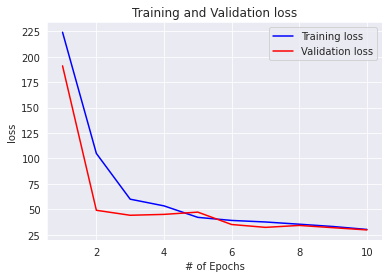


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 27.9409 - root_mean_squared_error: 5.1936 - val_loss: 24.8952 - val_root_mean_squared_error: 4.8939
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 26.8440 - root_mean_squared_error: 5.0902 - val_loss: 22.3488 - val_root_mean_squared_error: 4.6298
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 22.0198 - root_mean_squared_error: 4.5952 - val_loss: 24.0680 - val_root_mean_squared_error: 4.8148
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 20.4422 - root_mean_squared_error: 4.4233 - val_loss: 17.2756 - val_root_mean_squared_error: 4.0516
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 17.3408 - root_mean_squared_error: 4.0607 - val_loss: 15.8124 - val_root_mean_squared_error: 3.8699
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 14.9128 - root_mean_squared_error: 3.7529 - va

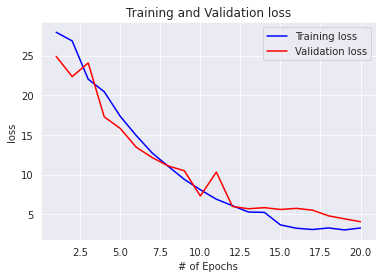


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 2.8498 - root_mean_squared_error: 1.4851 - val_loss: 4.5301 - val_root_mean_squared_error: 1.9723
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 2.6600 - root_mean_squared_error: 1.4219 - val_loss: 5.6573 - val_root_mean_squared_error: 2.2411
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 2.8359 - root_mean_squared_error: 1.4843 - val_loss: 5.8780 - val_root_mean_squared_error: 2.2910
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 3.1557 - root_mean_squared_error: 1.5900 - val_loss: 3.8517 - val_root_mean_squared_error: 1.7965
Epoch 5/30
5/5 [==============================] - 0s 7ms/step - loss: 2.7231 - root_mean_squared_error: 1.4493 - val_loss: 3.8673 - val_root_mean_squared_error: 1.8021
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 2.3702 - root_mean_squared_error: 1.3235 - val_loss: 3.6

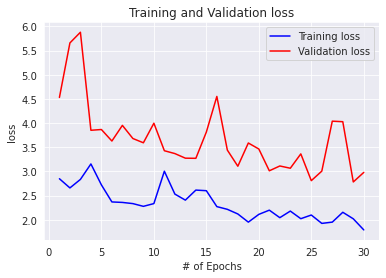


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 21ms/step - loss: 1.8511 - root_mean_squared_error: 1.1300 - val_loss: 2.7961 - val_root_mean_squared_error: 1.4908
Epoch 2/40
5/5 [==============================] - 0s 8ms/step - loss: 1.7653 - root_mean_squared_error: 1.0917 - val_loss: 2.6291 - val_root_mean_squared_error: 1.4338
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 1.9775 - root_mean_squared_error: 1.1851 - val_loss: 2.5631 - val_root_mean_squared_error: 1.4108
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 1.7652 - root_mean_squared_error: 1.0921 - val_loss: 2.7053 - val_root_mean_squared_error: 1.4605
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 1.8496 - root_mean_squared_error: 1.1303 - val_loss: 2.9516 - val_root_mean_squared_error: 1.5427
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 1.8341 - root_mean_squared_error: 1.1237 - val_loss: 2.4

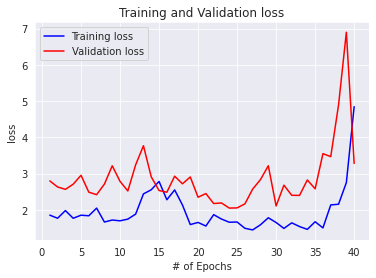

In [88]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_3_r_l = model3_r_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_3_r_l.history['loss']
  val_loss = history_i_3_r_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [89]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model3_r_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model3_r_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_r_l.evaluate(x_test,y_test)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 1.7259 - mse: 1.1659
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 1.3018 - mse: 0.7421
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 1.3639 - mse: 0.8044
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 1.2970 - mse: 0.7378
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3014 - mse: 0.7424
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2984 - mse: 0.7396
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2814 - mse: 0.7229
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2819 - mse: 0.7236
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2776 - mse: 0.7196
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2766 - mse: 0.7188
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2749 - mse: 0.7174
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 1.6434 - mse: 1.0939
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 1.5957 - mse: 1.0486
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 1.7519 - mse: 1.2071
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 1.4243 - mse: 0.8817
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2443 - mse: 0.7040
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2130 - mse: 0.6749
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2216 - mse: 0.6856
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 1.2124 - mse: 0.6785
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2182 - mse: 0.6863
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2342 - mse: 0.7044
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3259 - mse: 0.7981
Epoch 12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 34.8240 - mse: 34.3505
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 8.0292 - mse: 7.5687
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 6.1515 - mse: 5.7009
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 3.1753 - mse: 2.7330
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 2.3874 - mse: 1.9524
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 1.4447 - mse: 1.0161
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 1.3952 - mse: 0.9721
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 1.2396 - mse: 0.8213
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 1.2819 - mse: 0.8677
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 1.9246 - mse: 1.5140
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 1.3344 - mse: 0.9269
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 1177.8204 - mse: 1177.4324
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 158.8712 - mse: 158.4174
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 97.5337 - mse: 97.0172
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 63.8532 - mse: 63.3049
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 59.6269 - mse: 59.0664
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 45.8585 - mse: 45.2953
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 37.4892 - mse: 36.9275
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 31.0180 - mse: 30.4592
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 28.2901 - mse: 27.7334
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 22.6634 - mse: 22.1088
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss: 26.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 3485.9680 - mse: 3485.6399
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 250.0035 - mse: 249.3200
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 106.7197 - mse: 105.6435
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 127.9638 - mse: 126.6676
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 72.8209 - mse: 71.4310
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 59.5272 - mse: 58.1151
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 50.2878 - mse: 48.8872
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 41.7684 - mse: 40.3922
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 64.1514 - mse: 62.8022
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 33.2316 - mse: 31.9094
Epoch 11/40
8/8 [==============================] - 0s 3ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 11254.1768 - mse: 11252.9727
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 477.2232 - mse: 470.2219
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 347.2159 - mse: 334.4182
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 178.6530 - mse: 162.5155
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 100.9867 - mse: 83.1906
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 106.1484 - mse: 87.6140
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 94.5978 - mse: 75.7867
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 96.7381 - mse: 77.8693
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 94.7607 - mse: 75.9336
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 94.9177 - mse: 76.1751
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - l

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 1739422592.0000 - mse: 1739422592.0000
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 2383023.7500 - mse: 2382953.7500
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 230.0526 - mse: 94.0948
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 307.6687 - mse: 131.0878
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 353.0742 - mse: 155.0272
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 375.2041 - mse: 166.5072
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 385.6088 - mse: 171.8071
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 389.7015 - mse: 173.5056
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 390.9649 - mse: 173.6634
Epoch 10/40
8/8 [==============================] - 0s 3ms/step - loss: 390.9482 - mse: 173.1432
Epoch 11/40
8/8 [======================

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 14493609361408.0000 - mse: 14493609361408.0000
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 5813899886592.0000 - mse: 5813899362304.0000
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 246650593345536.0000 - mse: 246650593345536.0000
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 1311.6918 - mse: 191.2097
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 2916.4275 - mse: 1506.9336
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 5106.1021 - mse: 3533.9587
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 6502.0967 - mse: 4847.8643
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 7229.2173 - mse: 5535.5464
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 7579.0396 - mse: 5866.9297
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 7740.733

[7130.28515625, 5402.60205078125]

In [90]:
# Model 3 Building with Relu:

model3_r = tf.keras.Sequential()

model3_r.add(tf.keras.layers.Dense(14,  input_dim=x_train.shape[1], name="InputLayer"))
model3_r.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model3_r.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
model3_r.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3"))
model3_r.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model3_r.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model3_r.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 outputLayers (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,499
Trainable params: 12,499
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 42ms/step - loss: 627.1508 - root_mean_squared_error: 25.0430 - val_loss: 140.2326 - val_root_mean_squared_error: 11.8420
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 133.8035 - root_mean_squared_error: 11.5673 - val_loss: 67.9623 - val_root_mean_squared_error: 8.2439
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 46.6628 - root_mean_squared_error: 6.8310 - val_loss: 47.2360 - val_root_mean_squared_error: 6.8728
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 62.6855 - root_mean_squared_error: 7.9174 - val_loss: 37.0642 - val_root_mean_squared_error: 6.0880
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 40.6032 - root_mean_squared_error: 6.3721 - val_loss: 60.0946 - val_root_mean_squared_error: 7.7521
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 39.9639 - root_mean_squared_error: 6.321

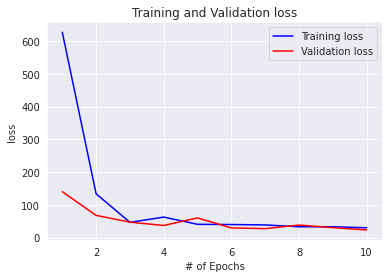


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 28.1151 - root_mean_squared_error: 5.3024 - val_loss: 28.3069 - val_root_mean_squared_error: 5.3204
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 26.6818 - root_mean_squared_error: 5.1654 - val_loss: 24.5451 - val_root_mean_squared_error: 4.9543
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 24.2439 - root_mean_squared_error: 4.9238 - val_loss: 21.8806 - val_root_mean_squared_error: 4.6777
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 23.3144 - root_mean_squared_error: 4.8285 - val_loss: 22.0120 - val_root_mean_squared_error: 4.6917
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 21.8051 - root_mean_squared_error: 4.6696 - val_loss: 17.5692 - val_root_mean_squared_error: 4.1916
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 21.0295 - root_mean_squared_error: 4.5858 - va

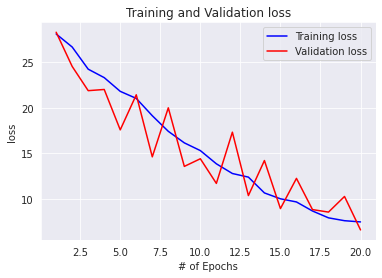


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 7.0816 - root_mean_squared_error: 2.6611 - val_loss: 10.9597 - val_root_mean_squared_error: 3.3105
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 6.4330 - root_mean_squared_error: 2.5363 - val_loss: 8.1904 - val_root_mean_squared_error: 2.8619
Epoch 3/30
5/5 [==============================] - 0s 8ms/step - loss: 5.8092 - root_mean_squared_error: 2.4102 - val_loss: 5.8255 - val_root_mean_squared_error: 2.4136
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 5.3612 - root_mean_squared_error: 2.3154 - val_loss: 7.4717 - val_root_mean_squared_error: 2.7334
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 4.8660 - root_mean_squared_error: 2.2059 - val_loss: 6.6638 - val_root_mean_squared_error: 2.5814
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 4.5728 - root_mean_squared_error: 2.1384 - val_loss: 5.

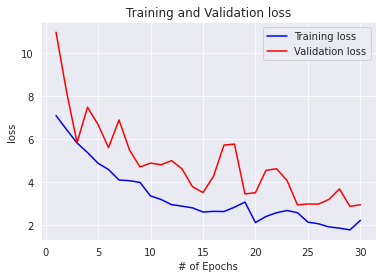


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 21ms/step - loss: 2.1821 - root_mean_squared_error: 1.4772 - val_loss: 2.6311 - val_root_mean_squared_error: 1.6221
Epoch 2/40
5/5 [==============================] - 0s 8ms/step - loss: 1.8143 - root_mean_squared_error: 1.3470 - val_loss: 3.2002 - val_root_mean_squared_error: 1.7889
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 2.4376 - root_mean_squared_error: 1.5613 - val_loss: 2.7996 - val_root_mean_squared_error: 1.6732
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 2.5621 - root_mean_squared_error: 1.6007 - val_loss: 3.2666 - val_root_mean_squared_error: 1.8074
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 2.0715 - root_mean_squared_error: 1.4393 - val_loss: 3.4876 - val_root_mean_squared_error: 1.8675
Epoch 6/40
5/5 [==============================] - 0s 14ms/step - loss: 2.0834 - root_mean_squared_error: 1.4434 - val_loss: 3.

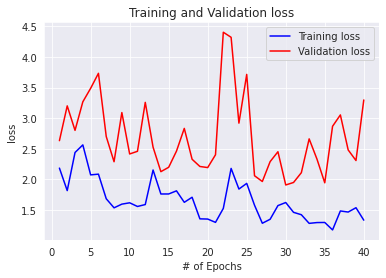

In [91]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_3_r = model3_r.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_3_r.history['loss']
  val_loss = history_i_3_r.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [92]:
# Model 3 with Building Sigmoid with Regularization:

model3_s_l = tf.keras.Sequential()

model3_s_l.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model3_s_l.add(tf.keras.layers.Dense(128, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer1"))
model3_s_l.add(tf.keras.layers.Dense(64, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer2"))
model3_s_l.add(tf.keras.layers.Dense(32, kernel_regularizer='l2', activation="sigmoid", name="HiddenLayer3"))
model3_s_l.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model3_s_l.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model3_s_l.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 outputLayers (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,499
Trainable params: 12,499
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 48ms/step - loss: 419.4292 - root_mean_squared_error: 20.4424 - val_loss: 329.3417 - val_root_mean_squared_error: 18.1060
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 398.6549 - root_mean_squared_error: 19.9287 - val_loss: 311.9514 - val_root_mean_squared_error: 17.6201
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 379.8887 - root_mean_squared_error: 19.4529 - val_loss: 296.3148 - val_root_mean_squared_error: 17.1714
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 362.8764 - root_mean_squared_error: 19.0112 - val_loss: 282.6500 - val_root_mean_squared_error: 16.7694
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 348.0599 - root_mean_squared_error: 18.6179 - val_loss: 270.7302 - val_root_mean_squared_error: 16.4106
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 334.8971 - root_mean_squar

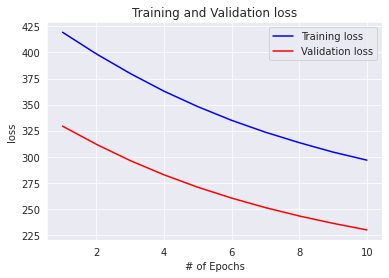


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 20ms/step - loss: 289.6763 - root_mean_squared_error: 16.9795 - val_loss: 224.2255 - val_root_mean_squared_error: 14.9283
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 283.6150 - root_mean_squared_error: 16.8002 - val_loss: 219.3652 - val_root_mean_squared_error: 14.7648
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 278.0986 - root_mean_squared_error: 16.6353 - val_loss: 215.1280 - val_root_mean_squared_error: 14.6207
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 273.2788 - root_mean_squared_error: 16.4899 - val_loss: 211.2588 - val_root_mean_squared_error: 14.4879
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 268.9821 - root_mean_squared_error: 16.3592 - val_loss: 207.6674 - val_root_mean_squared_error: 14.3636
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 264.7672 - root_mean_squar

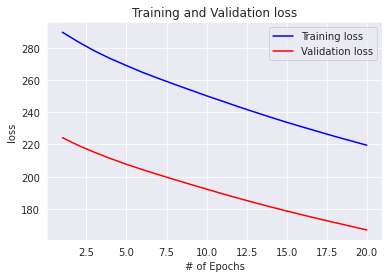


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 216.8446 - root_mean_squared_error: 14.6808 - val_loss: 164.6979 - val_root_mean_squared_error: 12.7820
Epoch 2/30
5/5 [==============================] - 0s 9ms/step - loss: 214.1044 - root_mean_squared_error: 14.5872 - val_loss: 162.4855 - val_root_mean_squared_error: 12.6953
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 211.3734 - root_mean_squared_error: 14.4934 - val_loss: 160.2923 - val_root_mean_squared_error: 12.6086
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 208.7918 - root_mean_squared_error: 14.4041 - val_loss: 158.0639 - val_root_mean_squared_error: 12.5200
Epoch 5/30
5/5 [==============================] - 0s 7ms/step - loss: 206.0207 - root_mean_squared_error: 14.3076 - val_loss: 155.8958 - val_root_mean_squared_error: 12.4331
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 203.4188 - root_mean_squar

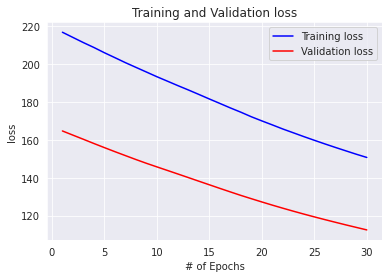


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 21ms/step - loss: 148.9592 - root_mean_squared_error: 12.1521 - val_loss: 111.1249 - val_root_mean_squared_error: 10.4805
Epoch 2/40
5/5 [==============================] - 0s 8ms/step - loss: 147.3259 - root_mean_squared_error: 12.0848 - val_loss: 109.8590 - val_root_mean_squared_error: 10.4201
Epoch 3/40
5/5 [==============================] - 0s 8ms/step - loss: 145.6199 - root_mean_squared_error: 12.0142 - val_loss: 108.6810 - val_root_mean_squared_error: 10.3636
Epoch 4/40
5/5 [==============================] - 0s 7ms/step - loss: 144.0689 - root_mean_squared_error: 11.9496 - val_loss: 107.5159 - val_root_mean_squared_error: 10.3074
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 142.5720 - root_mean_squared_error: 11.8870 - val_loss: 106.3588 - val_root_mean_squared_error: 10.2513
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 141.0106 - root_mean_squar

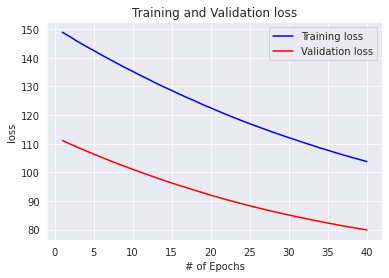

In [93]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_3_s_l = model3_s_l.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_3_s_l.history['loss']
  val_loss = history_i_3_s_l.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [94]:
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist1 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist2 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist3 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.01)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist4 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.03)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist5 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist6 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=0.3)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist7 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

optimizer = tf.keras.optimizers.Adam(lr=1)
model3_s_l.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
l1hist8 = model3_s_l.fit(x_train, y_train, batch_size = 25, epochs= 40)
model3_s_l.evaluate(x_test,y_test)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 103.2611 - mse: 102.1083
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 103.2406 - mse: 102.0883
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 103.2223 - mse: 102.0706
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 103.2036 - mse: 102.0526
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 103.1869 - mse: 102.0365
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 103.1707 - mse: 102.0210
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 103.1519 - mse: 102.0028
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 103.1344 - mse: 101.9860
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 103.1183 - mse: 101.9706
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 103.1039 - mse: 101.9569
Epoch 11/40
8/8 [==============================] - 0s 2ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 102.4791 - mse: 101.3545
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 102.2843 - mse: 101.1656
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 102.1090 - mse: 100.9968
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 101.9543 - mse: 100.8491
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 101.7797 - mse: 100.6818
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 101.6164 - mse: 100.5261
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 101.4408 - mse: 100.3571
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 101.2581 - mse: 100.1808
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 101.0663 - mse: 99.9949
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 100.8756 - mse: 99.8092
Epoch 11/40
8/8 [==============================] - 0s 2ms/step

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 95.2643 - mse: 94.4079
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 93.7508 - mse: 92.9438
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 92.4193 - mse: 91.6627
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 91.3524 - mse: 90.6516
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 90.1673 - mse: 89.5069
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 89.1159 - mse: 88.4965
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 88.3477 - mse: 87.7702
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 87.4834 - mse: 86.9309
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 86.5372 - mse: 86.0069
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 85.7807 - mse: 85.2767
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 85.0697 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 73.8753 - mse: 72.7895
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 77.2926 - mse: 76.1292
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 76.5222 - mse: 75.5129
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 75.9642 - mse: 75.1755
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 75.7493 - mse: 75.1722
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 75.6814 - mse: 75.2335
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 75.5979 - mse: 75.2033
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 75.9797 - mse: 75.6300
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 76.2533 - mse: 75.9633
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 76.3733 - mse: 76.0395
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 77.0186 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 80.5868 - mse: 80.2753
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 84.0125 - mse: 83.0334
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 81.6237 - mse: 80.0620
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 78.1851 - mse: 76.4947
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 76.4098 - mse: 74.7950
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 79.5022 - mse: 78.0899
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 76.9781 - mse: 75.8132
Epoch 8/40
8/8 [==============================] - 0s 2ms/step - loss: 76.3493 - mse: 75.3776
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 78.5923 - mse: 77.7836
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 75.7242 - mse: 75.0046
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 78.6401 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 4ms/step - loss: 79.8414 - mse: 78.4759
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 81.0704 - mse: 76.3558
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 80.2362 - mse: 76.0533
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 83.4110 - mse: 81.2032
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 79.6655 - mse: 78.2890
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 80.7935 - mse: 77.9024
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 81.6402 - mse: 77.4277
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 82.0297 - mse: 77.6581
Epoch 9/40
8/8 [==============================] - 0s 2ms/step - loss: 79.5422 - mse: 75.4756
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 84.5904 - mse: 81.0453
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 78.7709 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 147.5694 - mse: 135.5764
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 119.7875 - mse: 83.9854
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 133.3141 - mse: 98.3515
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 119.6382 - mse: 87.7367
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 106.0122 - mse: 75.1807
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 106.1792 - mse: 79.1490
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 100.2775 - mse: 75.3993
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 99.8866 - mse: 78.4077
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 100.5397 - mse: 82.4791
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 94.0573 - mse: 78.9907
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 3ms/step - loss: 362.2671 - mse: 293.1050
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 264.3884 - mse: 101.5072
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 266.0384 - mse: 116.8745
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 186.2573 - mse: 82.0733
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 162.2724 - mse: 80.1459
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 173.3709 - mse: 92.7874
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 161.7290 - mse: 103.9332
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 163.6250 - mse: 96.5118
Epoch 9/40
8/8 [==============================] - 0s 3ms/step - loss: 198.4911 - mse: 105.9705
Epoch 10/40
8/8 [==============================] - 0s 2ms/step - loss: 196.7885 - mse: 80.2712
Epoch 11/40
8/8 [==============================] - 0s 2ms/step - 

[208.06118774414062, 75.35486602783203]

In [95]:
# Model 3 with Building Sigmoid:

model3_s = tf.keras.Sequential()

model3_s.add(tf.keras.layers.Dense(14, input_dim=x_train.shape[1], name="InputLayer"))
model3_s.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1"))
model3_s.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2"))
model3_s.add(tf.keras.layers.Dense(32, activation="sigmoid", name="HiddenLayer3"))
model3_s.add(tf.keras.layers.Dense(1,  activation="linear", name="outputLayers"))

model3_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])                            # loss='mean_absolute_error'

model3_s.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 14)                210       
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 outputLayers (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,499
Trainable params: 12,499
Non-trainable params: 0
_________________________________________________________________



Training Model for  10 Epochs: 
Epoch 1/10
5/5 [==============================] - 1s 44ms/step - loss: 458.2406 - root_mean_squared_error: 21.4066 - val_loss: 363.0154 - val_root_mean_squared_error: 19.0530
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 436.4793 - root_mean_squared_error: 20.8921 - val_loss: 344.8658 - val_root_mean_squared_error: 18.5706
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 416.8733 - root_mean_squared_error: 20.4175 - val_loss: 328.7243 - val_root_mean_squared_error: 18.1308
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 399.4367 - root_mean_squared_error: 19.9859 - val_loss: 314.6119 - val_root_mean_squared_error: 17.7373
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 384.5416 - root_mean_squared_error: 19.6097 - val_loss: 302.4501 - val_root_mean_squared_error: 17.3911
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 371.2647 - root_mean_squar

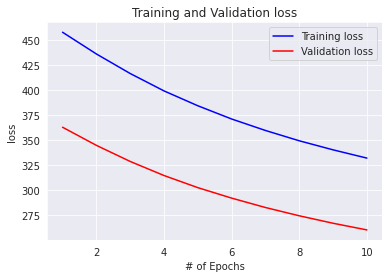


Training Model for  20 Epochs: 
Epoch 1/20
5/5 [==============================] - 0s 19ms/step - loss: 324.6570 - root_mean_squared_error: 18.0182 - val_loss: 254.1124 - val_root_mean_squared_error: 15.9409
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 318.0302 - root_mean_squared_error: 17.8334 - val_loss: 248.7526 - val_root_mean_squared_error: 15.7719
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 312.0960 - root_mean_squared_error: 17.6662 - val_loss: 243.8833 - val_root_mean_squared_error: 15.6168
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 306.6951 - root_mean_squared_error: 17.5127 - val_loss: 239.4183 - val_root_mean_squared_error: 15.4731
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 301.6952 - root_mean_squared_error: 17.3694 - val_loss: 235.3013 - val_root_mean_squared_error: 15.3395
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 297.0177 - root_mean_squar

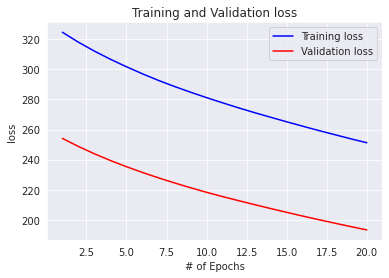


Training Model for  30 Epochs: 
Epoch 1/30
5/5 [==============================] - 0s 20ms/step - loss: 248.5616 - root_mean_squared_error: 15.7658 - val_loss: 191.1322 - val_root_mean_squared_error: 13.8251
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 246.0346 - root_mean_squared_error: 15.6855 - val_loss: 188.9933 - val_root_mean_squared_error: 13.7475
Epoch 3/30
5/5 [==============================] - 0s 7ms/step - loss: 243.5078 - root_mean_squared_error: 15.6047 - val_loss: 186.9169 - val_root_mean_squared_error: 13.6718
Epoch 4/30
5/5 [==============================] - 0s 9ms/step - loss: 241.0285 - root_mean_squared_error: 15.5251 - val_loss: 184.8848 - val_root_mean_squared_error: 13.5972
Epoch 5/30
5/5 [==============================] - 0s 7ms/step - loss: 238.6505 - root_mean_squared_error: 15.4483 - val_loss: 182.8775 - val_root_mean_squared_error: 13.5232
Epoch 6/30
5/5 [==============================] - 0s 9ms/step - loss: 236.2185 - root_mean_squa

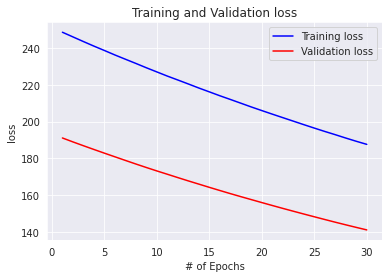


Training Model for  40 Epochs: 
Epoch 1/40
5/5 [==============================] - 0s 22ms/step - loss: 185.9440 - root_mean_squared_error: 13.6361 - val_loss: 139.8438 - val_root_mean_squared_error: 11.8256
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 184.2625 - root_mean_squared_error: 13.5743 - val_loss: 138.5033 - val_root_mean_squared_error: 11.7687
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 182.5746 - root_mean_squared_error: 13.5120 - val_loss: 137.1809 - val_root_mean_squared_error: 11.7124
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 180.9451 - root_mean_squared_error: 13.4516 - val_loss: 135.8604 - val_root_mean_squared_error: 11.6559
Epoch 5/40
5/5 [==============================] - 0s 8ms/step - loss: 179.3119 - root_mean_squared_error: 13.3907 - val_loss: 134.5446 - val_root_mean_squared_error: 11.5993
Epoch 6/40
5/5 [==============================] - 0s 8ms/step - loss: 177.7003 - root_mean_squar

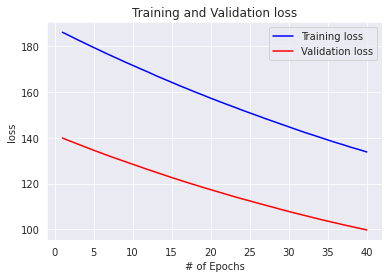

In [96]:
var_epoch=[10, 20, 30, 40]

for i in var_epoch:
  print("\nTraining Model for " , i , "Epochs: ")
  history_i_3_s = model3_s.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=40, epochs=i)
  print("\nVisualizing the Training and Validation loss against " , i , "Epochs: ")
  sns.set_style("darkgrid")

  # Get the details form the history object

  loss = history_i_3_s.history['loss']
  val_loss = history_i_3_s.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()

  #Train and validation loss

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('# of Epochs')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()